memberdict=tree.all_members
print(memberdict)

keylist=tree.keys()
print(keylist)

In [1]:
%run "00_predef.ipynb"

In [2]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import time

start_time = time.time()

file = uproot.open("1681238654_35.root")
tree = file["ntuple_sig"]

# Read all branches at once
all_data = tree.arrays()

# Convert awkward arrays to numpy arrays and store them in a list
all_arrays = [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

# Stack arrays horizontally
all_arrays_stacked = np.vstack(all_arrays)

end_time = time.time()
elapsed_time = end_time - start_time

print("Shape of allArrays:", all_arrays_stacked.shape)
print("Time taken to read and concatenate the data: {:.2f} seconds".format(elapsed_time))



Shape of allArrays: (71, 232213)
Time taken to read and concatenate the data: 0.21 seconds


/home/fdolek/work/data/1680792953_35.root


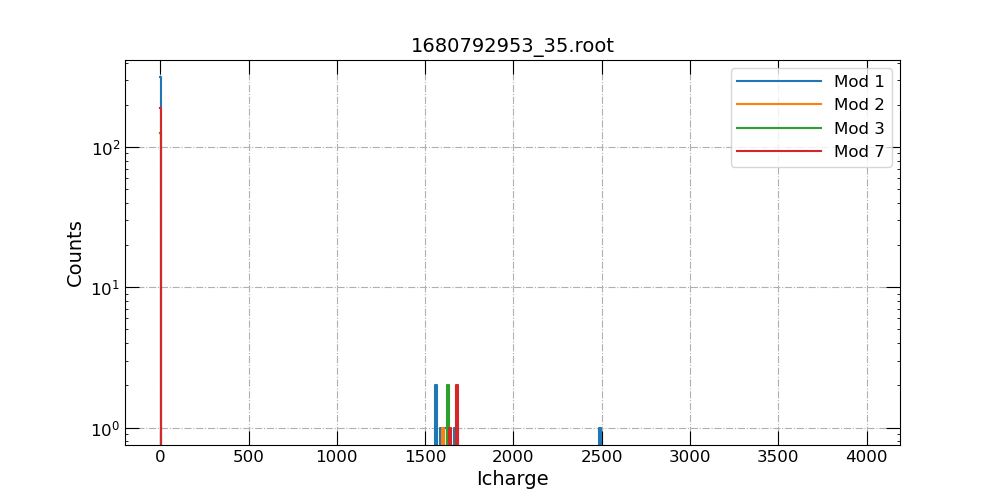

In [53]:
import os
import uproot
import awkward as ak
import numpy as np
import re
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1680792953_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 1
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7

    def plot_histograms(channels, mod_masks, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        for i, mod_mask in enumerate(mod_masks):
            hist, bin_edges = np.histogram(channels[:, mod_mask & low100 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
            plt.step(bin_edges[:-1], hist, where='mid', label=mod_labels[i])
        
        
        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    #bin_range = (1000, 4000)
    #bin_width = 10
    bin_range = (0, 4000)
    bin_width = 10

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width, title)

    

/home/fdolek/work/data/1680792953_35.root


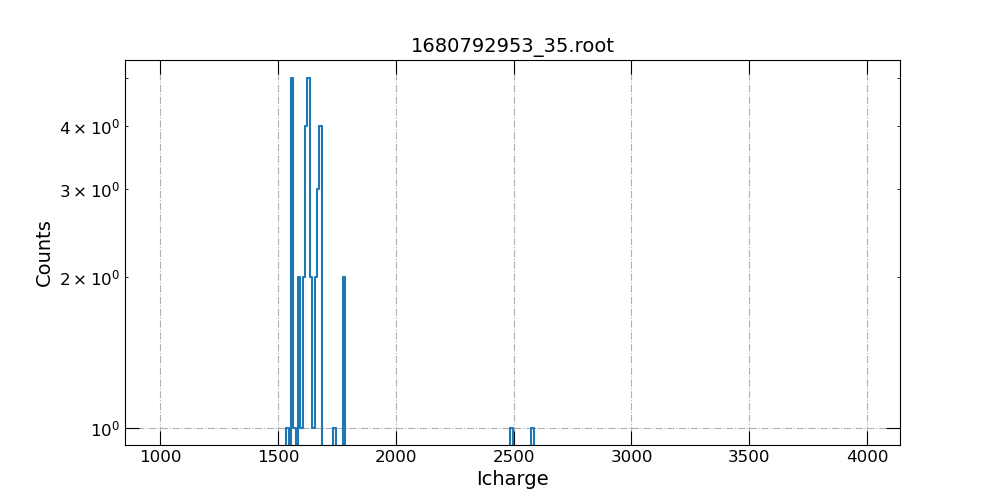

In [84]:
import os
import uproot
import awkward as ak
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1680792953_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7
    
    mod_combined = np.logical_or.reduce([mod1, mod2, mod3, mod7])

    def plot_histogram(channels, mod_mask, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        hist, bin_edges = np.histogram(channels[:, mod_mask & low100 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
        
        plt.step(bin_edges[:-1], hist, where='mid')

        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.title(title)
        plt.show()

    # Define the bin range and width
    bin_range = (1000, 4000)
    bin_width = 10

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histogram
    plot_histogram(channels, mod_combined, bin_range, bin_width, title)


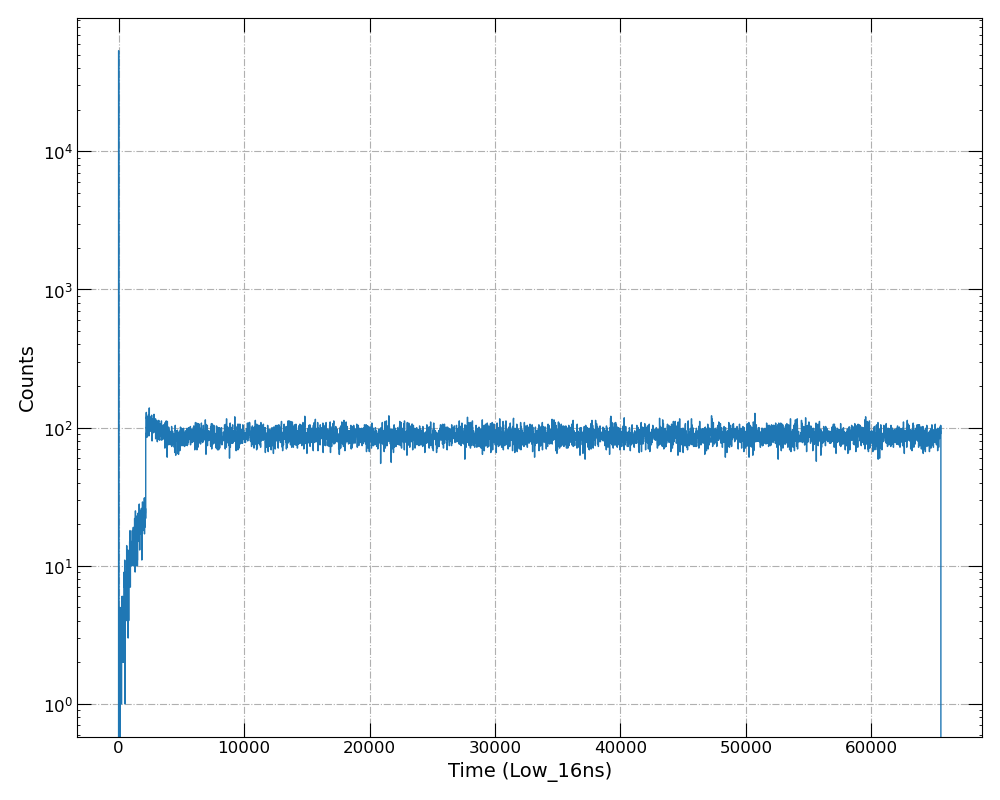

In [30]:
fig, ax = plt.subplots()

ax.hist(stime_16ns_low, bins=5000, histtype="step", log=False)
ax.set_xlabel('Time (Low_16ns)')
ax.set_ylabel('Counts')
ax.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

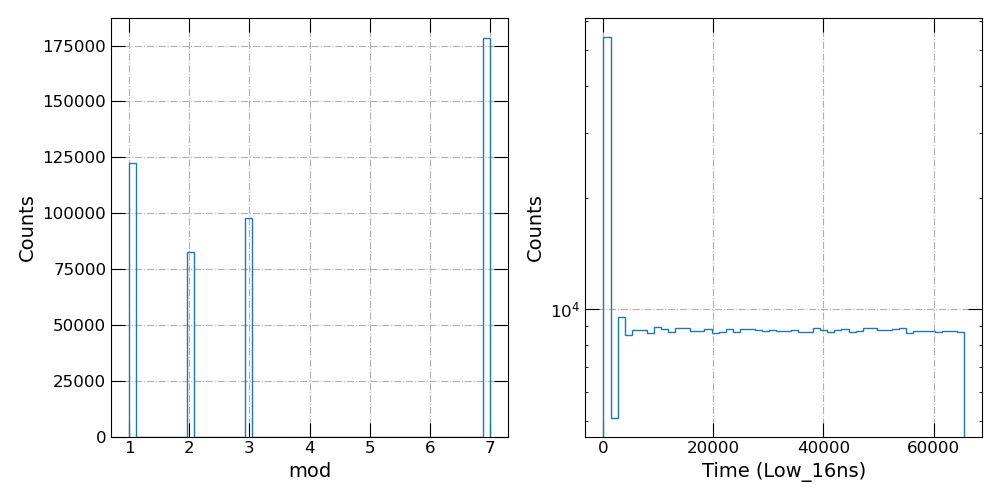

In [15]:
import matplotlib.pyplot as plt

# create a grid of subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# plot the first histogram in the first subplot
ax1.hist(smodule, bins=50, histtype="step", log=False)
ax1.set_xlabel('mod')
ax1.set_ylabel('Counts')

# plot the second histogram in the second subplot
ax2.hist(stime_16ns_low, bins=50, histtype="step", log=False)
ax2.set_xlabel('Time (Low_16ns)')
ax2.set_ylabel('Counts')
ax2.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [62]:
wf=channels[:, mod7 & low100 ]


In [61]:
wf.shape

(64, 3)

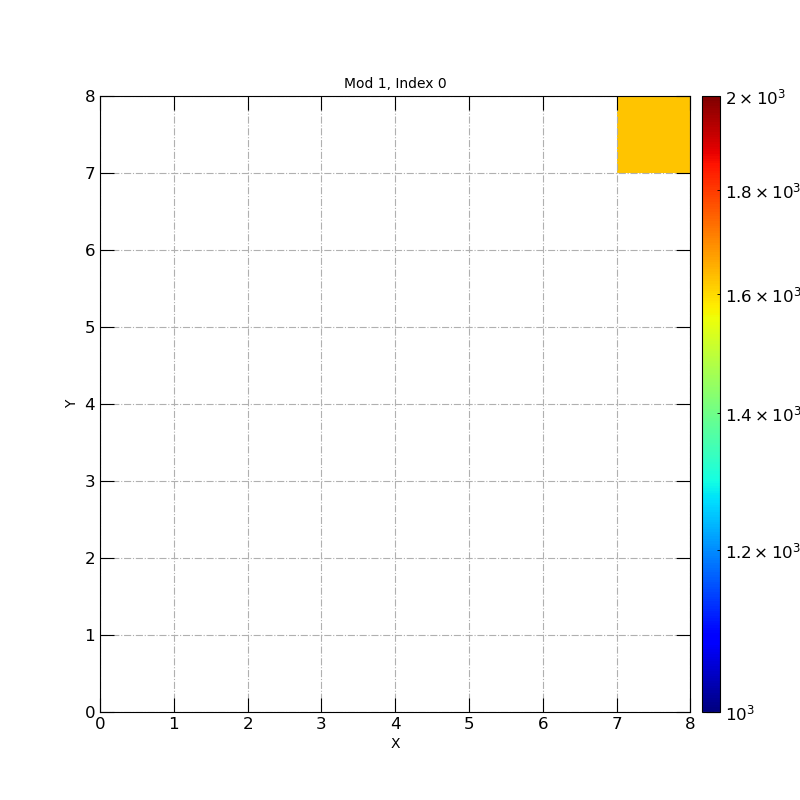

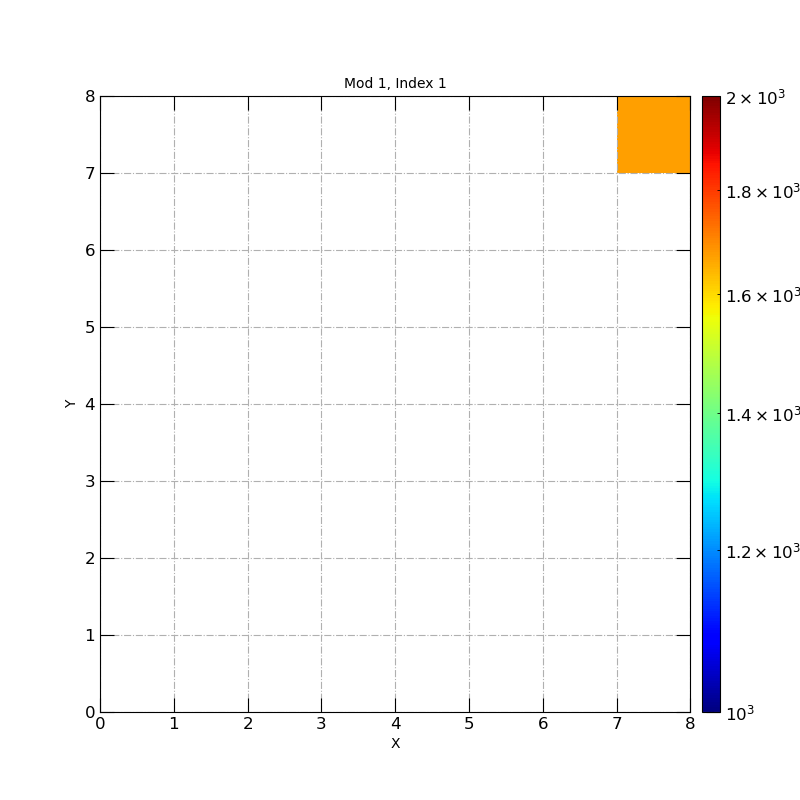

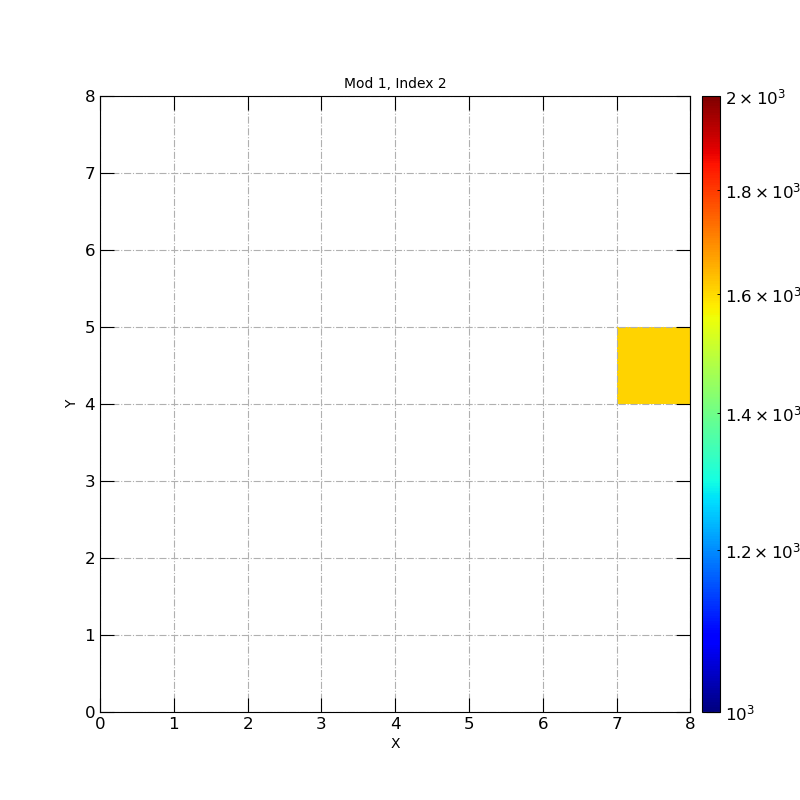

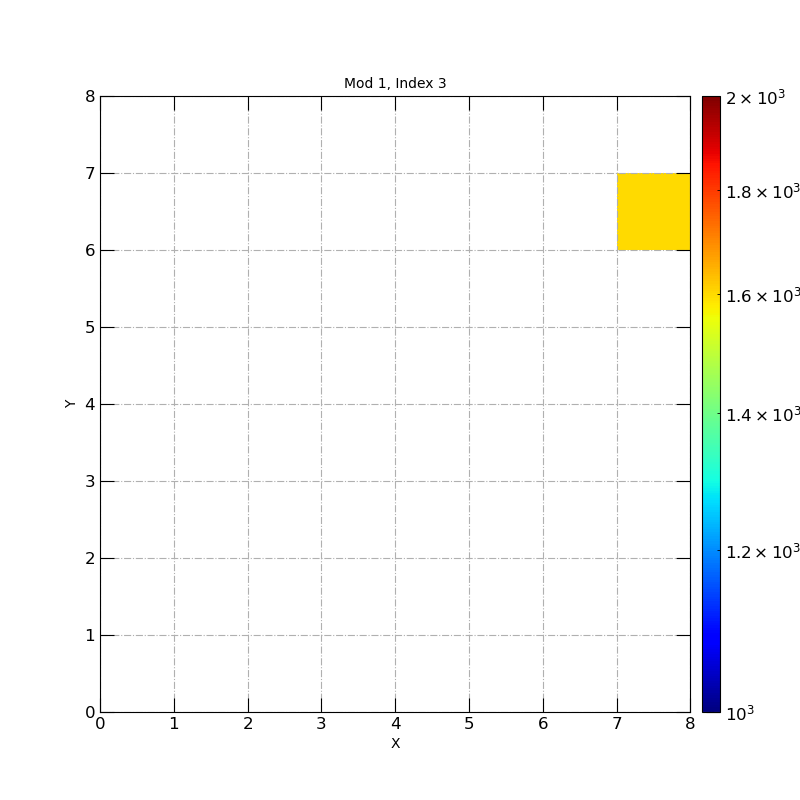

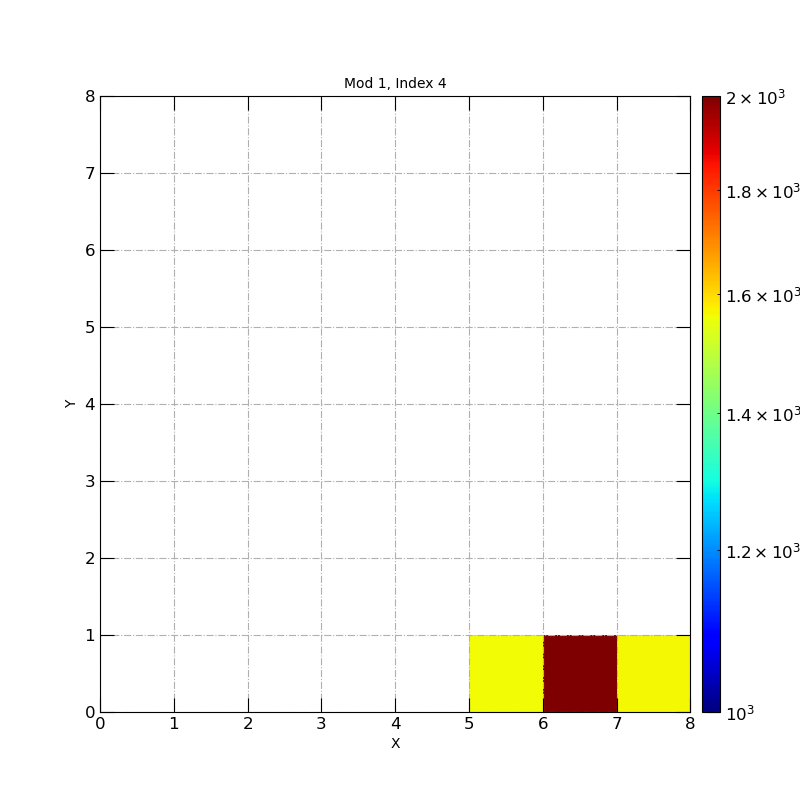

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

%matplotlib widget

modules = [mod1, mod2, mod3, mod7]
module_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']
module_index = 0 # Set this to the desired module index (0-3)

wf = channels[:, modules[module_index] & low100]

for i in range(wf.shape[1]):
    fig, ax = plt.subplots()
    matrix = wf[:, i].reshape(8, 8)
    im = ax.imshow(matrix, origin='lower', aspect='auto', norm=LogNorm(vmin=1000, vmax=2000), extent=[0, 8, 0, 8])
    im.set_cmap('jet')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "3%", pad="2%")
    cb = plt.colorbar(im, cax=cax)
    fig.set_size_inches(8, 8)
    ax.set_xlabel("X", fontsize=10)
    ax.set_ylabel("Y", fontsize=10)
    cb.set_label("Charge", fontsize=10)
    title = f"{module_labels[module_index]}, Index {i}"
    ax.set_title(title, fontsize=10)
    plt.show()


In [76]:
import os
import uproot
import awkward as ak
import numpy as np
import re

data_dir = '/home/fdolek/work/data/'
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

for root_file in root_files:
    file_name = os.path.basename(root_file)
    match = re.search(r'\d+_\d+', file_name) # extract digits in the pattern of 12345_67
    if match:
        run_name = match.group()
        print(run_name)

1680792953_35
1680793033_35
1680793093_35
1680793193_35
1680793013_35
1680792993_35
1680793173_35
1680792973_35
1680793073_35
1680793153_35
1680793053_35
1680793113_35
1680793133_35


In [79]:
import os
import re

data_dir = '/home/fdolek/work/data/'
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

for root_file in root_files:
    file_name = os.path.basename(root_file)
    match = re.search(r'\d+_\d+', file_name) # extract digits in the pattern of 12345_67
    if match:
        run_name = match.group()
        print(run_name)

1680792953_35
1680793033_35
1680793093_35
1680793193_35
1680793013_35
1680792993_35
1680793173_35
1680792973_35
1680793073_35
1680793153_35
1680793053_35
1680793113_35
1680793133_35


/home/fdolek/work/data/1680792953_35.root


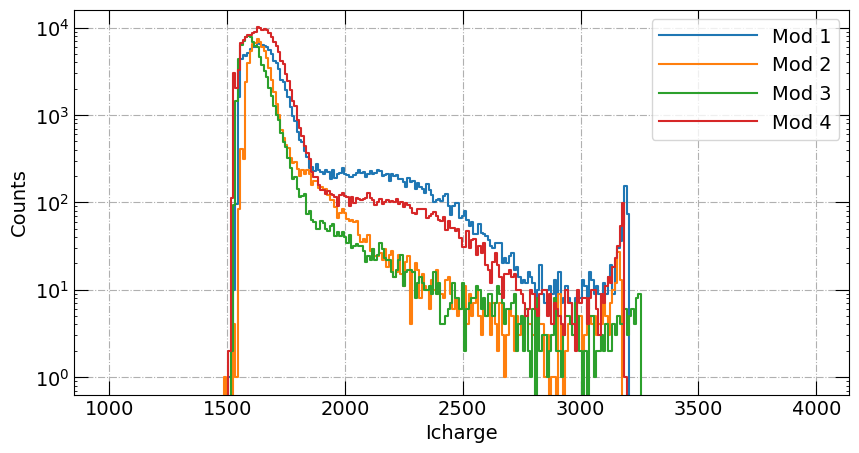

/home/fdolek/work/data/1680793033_35.root


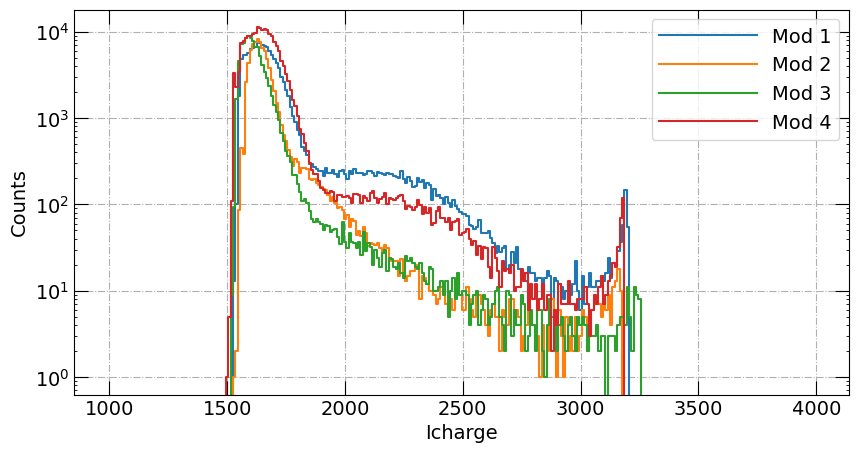

/home/fdolek/work/data/1680793093_35.root


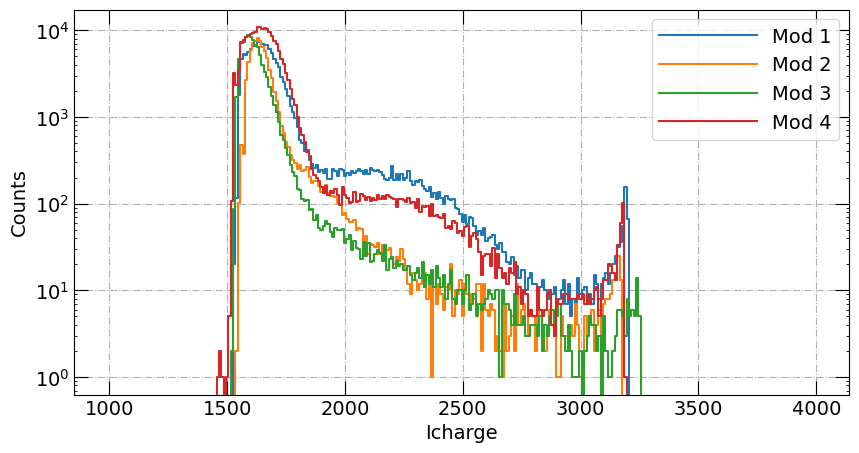

/home/fdolek/work/data/1680793193_35.root


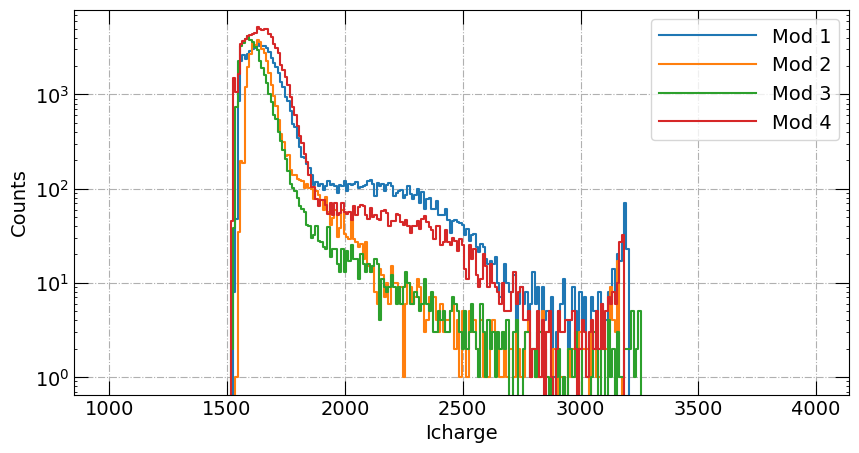

/home/fdolek/work/data/1680793013_35.root


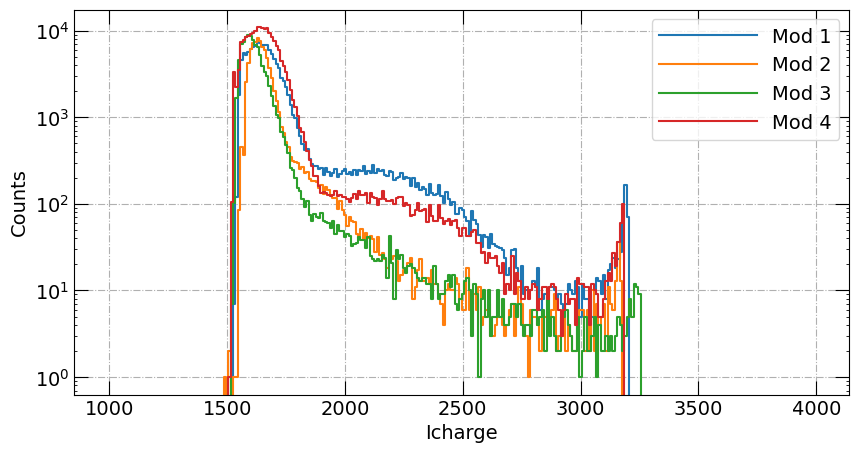

/home/fdolek/work/data/1680792993_35.root


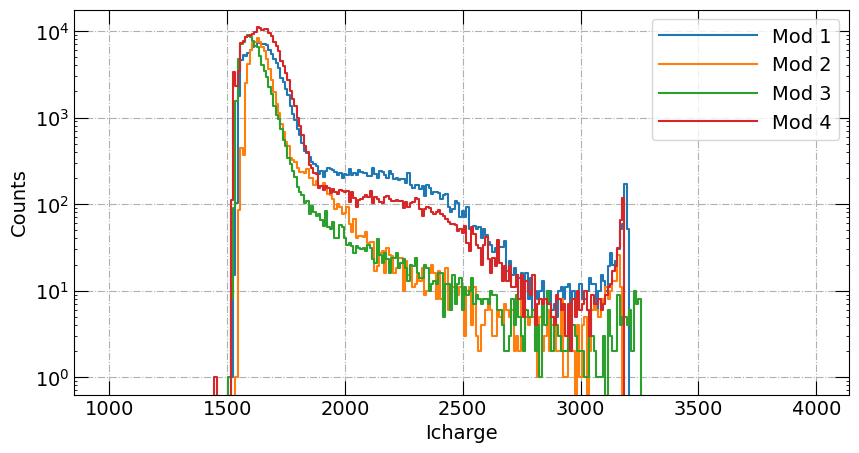

/home/fdolek/work/data/1680793173_35.root


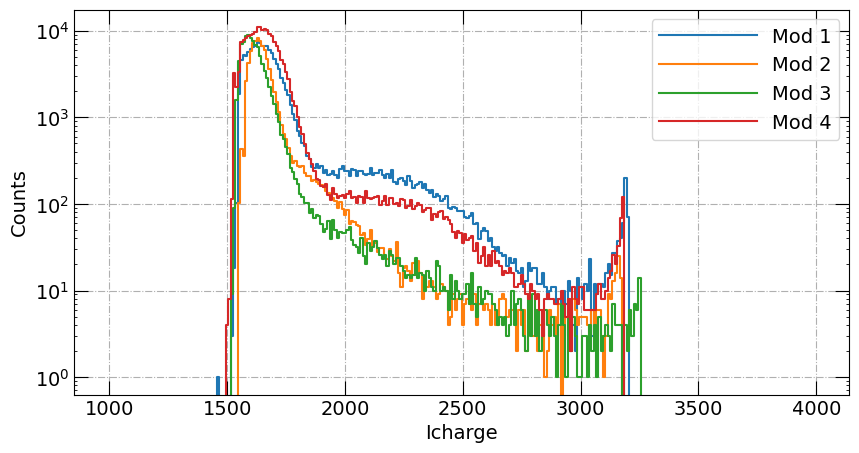

/home/fdolek/work/data/1680792973_35.root


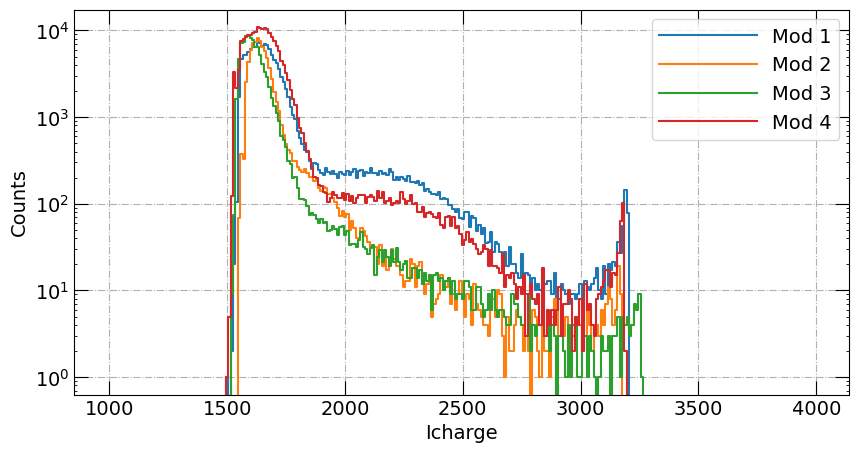

/home/fdolek/work/data/1680793073_35.root


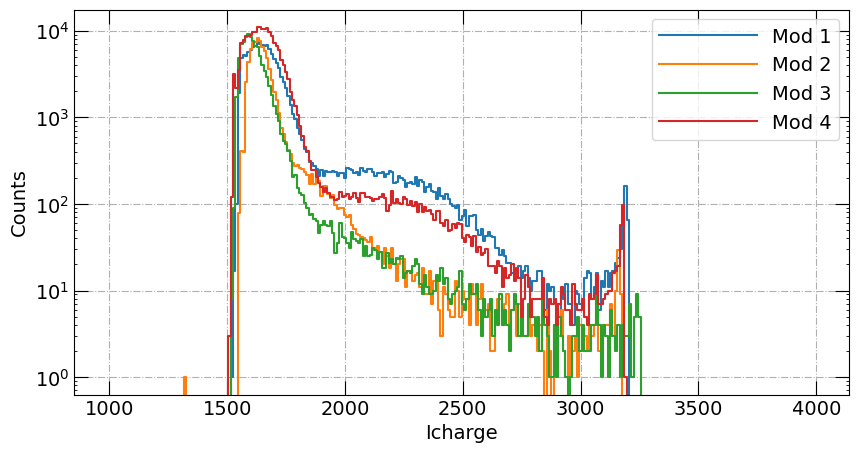

/home/fdolek/work/data/1680793153_35.root


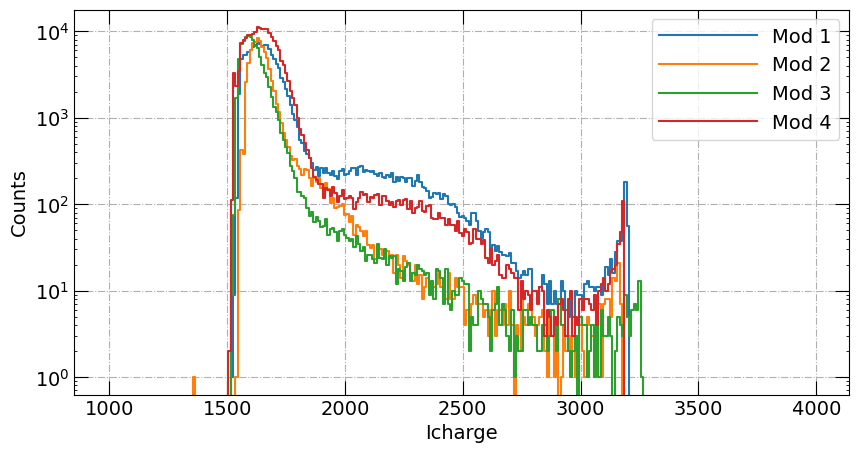

/home/fdolek/work/data/1680793053_35.root


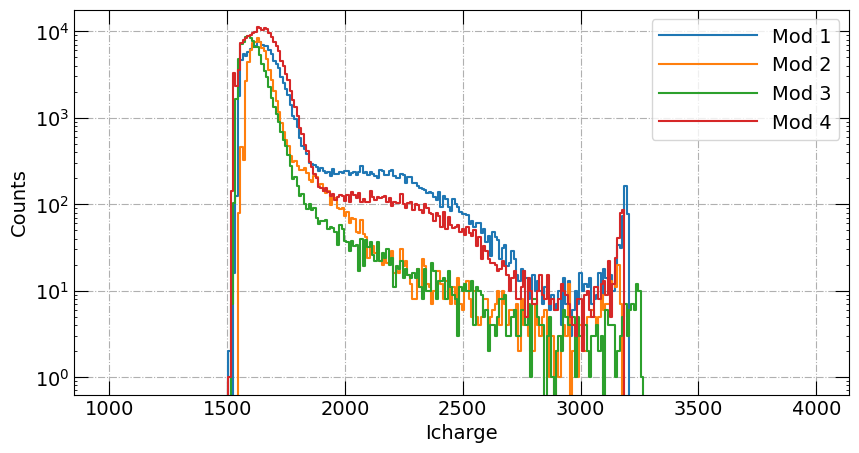

/home/fdolek/work/data/1680793113_35.root


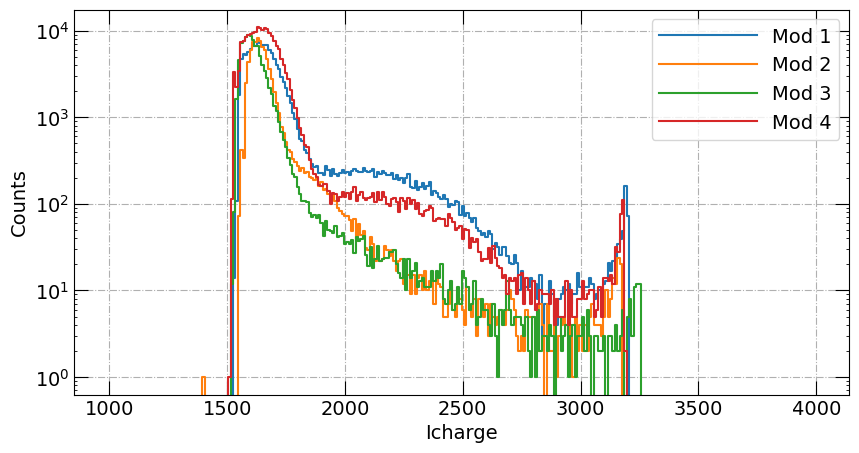

/home/fdolek/work/data/1680793133_35.root


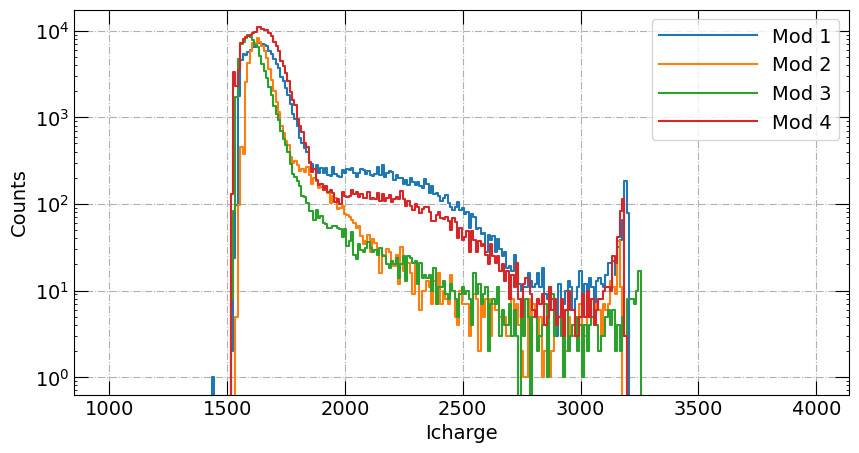

In [90]:
import os
import uproot
import awkward as ak
import numpy as np
import re
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = True
single_file_name = '1680792953_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]

    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7

    def plot_histograms(channels, mod_masks, bin_range, bin_width):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        for i, mod_mask in enumerate(mod_masks):
            hist, bin_edges = np.histogram(channels[:, mod_mask].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
            plt.step(bin_edges[:-1], hist, where='mid', label=f'Mod {i+1}')

        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.legend()
        plt.show()
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    bin_range = (1000, 4000)
    bin_width = 10

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width)            


    

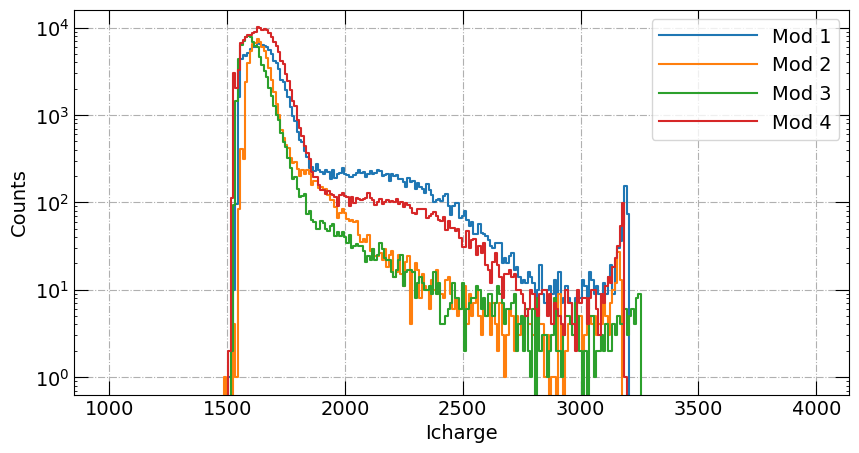

In [63]:
smodule= all_arrays_stacked[64]
stype= all_arrays_stacked[65]
slen= all_arrays_stacked[66]
stime_sec_high= all_arrays_stacked[67]
stime_sec_low= all_arrays_stacked[68]
stime_16ns_high= all_arrays_stacked[69]
stime_16ns_low= all_arrays_stacked[70]
channels=all_arrays_stacked[:64]

In [64]:
mod1 = smodule == 1
mod2 = smodule == 2
mod3 = smodule == 3
mod7 = smodule == 7

In [ ]:
def plot_histograms(channels, mod_masks, bin_range, bin_width):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for i, mod_mask in enumerate(mod_masks):
        hist, bin_edges = np.histogram(channels[:, mod_mask].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
        plt.step(bin_edges[:-1], hist, where='mid', label=f'Mod {i+1}')

    plt.xlabel('Icharge')
    plt.ylabel('Counts')
    ax.set_yscale('log')
    plt.legend()
    plt.show()

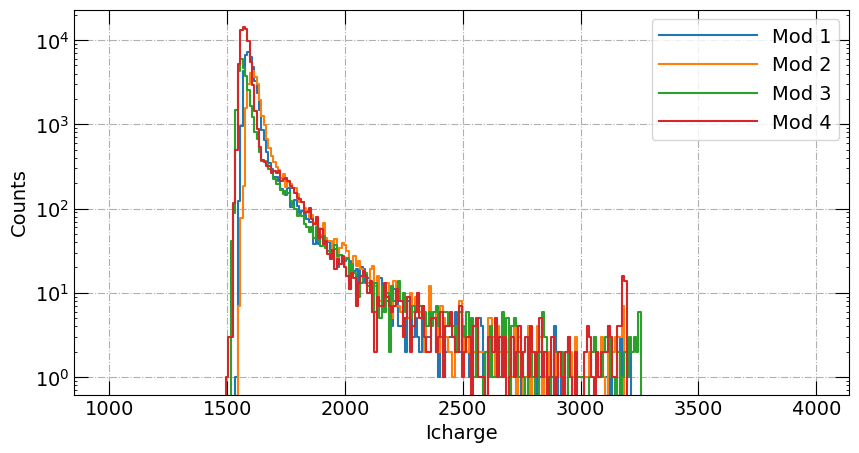

In [65]:
# Define the modulation masks and labels
mod_masks = [mod1, mod2, mod3, mod7]
mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

# Define the bin range and width
bin_range = (1000, 4000)
bin_width = 10

# Plot the histograms
plot_histograms(channels, mod_masks, bin_range, bin_width)

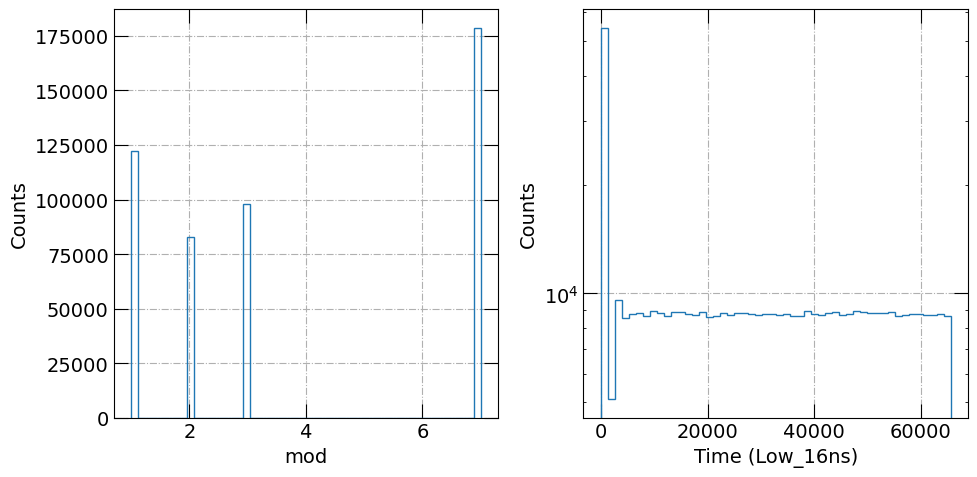

In [8]:
import matplotlib.pyplot as plt

# create a grid of subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# plot the first histogram in the first subplot
ax1.hist(smodule, bins=50, histtype="step", log=False)
ax1.set_xlabel('mod')
ax1.set_ylabel('Counts')

# plot the second histogram in the second subplot
ax2.hist(stime_16ns_low, bins=50, histtype="step", log=False)
ax2.set_xlabel('Time (Low_16ns)')
ax2.set_ylabel('Counts')
ax2.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [59]:
mod1 = smodule == 1
mod2 = smodule == 2
mod3 = smodule == 3
mod7 = smodule == 7

In [9]:
def plot_histograms(channels, mod_masks, bin_range, bin_width):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for i, mod_mask in enumerate(mod_masks):
        hist, bin_edges = np.histogram(channels[:, mod_mask].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
        plt.step(bin_edges[:-1], hist, where='mid', label=f'Mod {i+1}')

    plt.xlabel('Icharge')
    plt.ylabel('Counts')
    ax.set_yscale('log')
    plt.legend()
    plt.show()

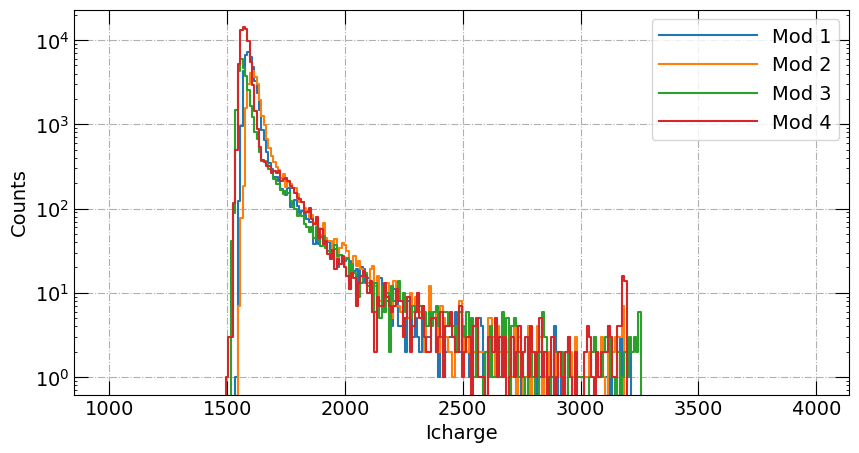

In [61]:
# Define the modulation masks and labels
mod_masks = [mod1, mod2, mod3, mod7]
mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

# Define the bin range and width
bin_range = (1000, 4000)
bin_width = 10

# Plot the histograms
plot_histograms(channels, mod_masks, bin_range, bin_width)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

#plt.hist(channels[:, mod7].flatten(), bins=np.arange(0, 7000, 100), histtype="step", log=False)

plt.hist(channels[3][mod1].flatten(), bins=50, histtype="step", log=False)
plt.hist(channels[3][mod2].flatten(), bins=50, histtype="step", log=False)
plt.hist(channels[3][mod3].flatten(), bins=50, histtype="step", log=False)
plt.hist(channels[3][mod7].flatten(), bins=50, histtype="step", log=False)

plt.xlabel('Time (Low_16ns)')
plt.ylabel('Counts')
ax.set_yscale('log')
plt.show()


In [ ]:
wf=all_arrays_stacked[201]
wf

In [ ]:
wf[:64].shape

In [ ]:
%matplotlib widget

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

mpl.rcParams.update({'font.size' : 12})

fig, ax = plt.subplots()
wf=all_arrays_stacked[300]
matrix = wf[:64].reshape(8, 8)

im = ax.imshow(matrix, origin='lower', aspect='auto', norm=LogNorm(vmin=1000, vmax=2000), extent=[0, 8, 0, 8])
im.set_cmap('jet')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="2%")
cb = plt.colorbar(im, cax=cax)

fig.set_size_inches(8, 8)
ax.set_xlabel("X", fontsize=10)
ax.set_ylabel("Y", fontsize=10)

cb.set_label("Charge", fontsize=10)

plt.show()

In [ ]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams.update({'font.size' : 10})


fig, ax = plt.subplots()
matrix = wf[:64].reshape(8, 8)

im = ax.imshow(matrix, origin='lower', aspect='equal', vmax=-10, vmin=10, cmap='inferno')
# set aspect='equal' to make the cells identical squares

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="2%")
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
fig.set_size_inches(8,8)
ax.set_xlabel("X")
ax.set_ylabel("Y")
# ax.axvline(x=47)
#ax.axvline(x=87)

cb.set_label("iCharge")
plt.grid(False)

plt.show()

In [ ]:
%matplotlib widget

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams.update({'font.size' : 12})

fig, ax = plt.subplots()
matrix = wf[:64].reshape(8, 8)

im = ax.imshow(matrix, origin='lower', aspect='auto', vmax=-1, vmin=10, extent=[0, 8, 0, 8])
im.set_cmap('inferno')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="2%")
cb = plt.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=12)  # increase font size of colorbar labels

fig.set_size_inches(8, 8)
ax.set_xlabel("pix1", fontsize=12)
ax.set_ylabel("pix1", fontsize=12)

cb.set_label("Charge/tick/channel (ke)", fontsize=12)
plt.grid(False)

plt.show()

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

def plot_histogram(branch_name, binwidth, xmin, xmax):

    ax.hist(stime_16ns_low, bins=np.arange(xmin, xmax, binwidth), histtype="step", label='test')

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')

    plt.show()

# Define the interactive widgets
branch_widget = widgets.Dropdown(options=list(tree.keys()), value='s22', description='Branch name:')
binwidth_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description="Bin width")
xmin_widget = widgets.FloatSlider(value=0, min=0, max=3000, step=10, description="X min")
xmax_widget = widgets.FloatSlider(value=3000, min=0, max=10000, step=10, description="X max")

# Display the interactive plot
interactive_plot = widgets.interactive(plot_histogram, branch_name=branch_widget, binwidth=binwidth_widget, xmin=xmin_widget, xmax=xmax_widget)
display(interactive_plot)


In [ ]:
# Check the shape of the resulting 2D array
print("Shape of 2D array:", data_2d.shape)

In [ ]:
type(numpy_array)

In [ ]:
numpy_array.size

In [ ]:
data_2d = np.vstack(numpy_array)


In [ ]:
data_2d.shape

In [ ]:

import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

for branch in tree.keys():
    # Get the branch and store the data as a NumPy array
    if branch != "s9":  # Only plot the "s21" branch
        continue
    
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=50, histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')
    plt.savefig("plots/{}.png".format(data_branch.name))


In [ ]:

import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

In [ ]:
myfile.all_members

In [ ]:

import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

for branch in tree.keys():
    # Get the branch and store the data as a NumPy array
    if branch != "smodule":  # Only plot the "s21" branch
        continue
    
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    

In [ ]:
data.size

In [ ]:
print('stime_16ns_low')
data[:100]

In [ ]:
(data[3]-data[4])#*16

In [ ]:
print('smodule')
data[:100]

In [ ]:
print('stime_16ns_low')
data[:10]

In [ ]:
print('stime_16ns_high')
data[:10]

In [ ]:

import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

for branch in tree.keys():
    # Get the branch and store the data as a NumPy array
    if branch != "s9":  # Only plot the "s21" branch
        continue
    
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=50, histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')
    plt.savefig("plots/{}.png".format(data_branch.name))

    #plt.show()

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

def plot_histogram(branch_name, binwidth, xmin, xmax):
    data_branch = tree[branch_name]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=np.arange(xmin, xmax, binwidth), histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')

    plt.show()

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

# Define the interactive widgets
branch_widget = widgets.Dropdown(options=list(tree.keys()), value='s22', description='Branch name:')
binwidth_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description="Bin width")
xmin_widget = widgets.FloatSlider(value=0, min=0, max=3000, step=10, description="X min")
xmax_widget = widgets.FloatSlider(value=3000, min=0, max=10000, step=10, description="X max")

# Display the interactive plot
interactive_plot = widgets.interactive(plot_histogram, branch_name=branch_widget, binwidth=binwidth_widget, xmin=xmin_widget, xmax=xmax_widget)
display(interactive_plot)


In [ ]:
import uproot
import numpy as np

# Open the ROOT file and get the ntuple
file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

# Determine the number of entries in the ntuple
n_entries = tree.num_entries

# Create an empty 2D numpy array to hold the data
data = np.empty((n_entries, 64))

# Loop over each entry in the ntuple
for i_entry in range(n_entries):
    # Get the data for each of the 64 branches
    entry = tree[i_entry]
    data[i_entry] = [entry[f"s{i}"] for i in range(1, 65)]

In [ ]:
branch_names = tree.keys()
print("Branch names in tree:")
for name in branch_names:
    print("- {}".format(name))

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import os

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

def plot_histogram(branch, xmin, xmax):
    # Get the branch and store the data as a NumPy array
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=50, range=(xmin, xmax), histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')
    plt.show()

# Define the interactive widgets
branch_widget = widgets.Dropdown(options=tree.keys(), value='s22', description='Branch:')
binwidth_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description="Bin width")
xmin_widget = widgets.FloatSlider(value=0, min=0, max=10000, step=1, description="X min")
xmax_widget = widgets.FloatSlider(value=3000, min=0, max=10000, step=1, description="X max")

# Display the interactive plot
interactive_plot = widgets.interactive(plot_histogram, branch=branch_widget, xmin=xmin_widget, xmax=xmax_widget)
display(interactive_plot)

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

def plot_histogram(branch, binwidth, xmin, xmax):
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=np.arange(xmin, xmax, binwidth), histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')
    plt.savefig("plots/{}.png".format(data_branch.name))

    plt.show()

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

branch_widget = widgets.Dropdown(
    options=tree.keys(),
    value='s22',
    description='Branch:',
    disabled=False
)

binwidth_widget = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=10,
    step=0.1,
    description='Bin width:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

xmin_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=10000,
    step=0.1,
    description='X min:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

xmax_widget = widgets.FloatSlider(
    value=3000,
    min=0,
    max=10000,
    step=0.1,
    description='X max:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

interactive_plot = widgets.interactive_output(plot_histogram, {'branch': branch_widget, 'binwidth': binwidth_widget, 'xmin': xmin_widget, 'xmax': xmax_widget})

widgets.VBox([widgets.HBox([branch_widget, binwidth_widget, xmin_widget, xmax_widget]), interactive_plot])


In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

file = uproot.open("my_file.root")
tree = file["ntuple_sig"]

if not os.path.exists("plots"):
    os.makedirs("plots")

def plot_histogram(branch, binwidth, xmin, xmax):
    # Get the branch and store the data as a NumPy array
    data_branch = tree[branch]
    data = ak.to_numpy(data_branch.array())
    newdata = data.reshape(4, int(data.size/4))

    labels = ["maPMT1", "maPMT2", "maPMT3", "maPMT4"]

    fig, ax = plt.subplots()

    for i in range(4):
        ax.hist(newdata[i], bins=np.arange(xmin, xmax, binwidth), histtype="step", label=labels[i])

    ax.set_xlabel(data_branch.name)
    ax.set_ylabel("Counts")
    ax.set_title(f"Histogram of {data_branch.name} for maPMTs")
    ax.legend()

    ax.set_yscale('log')
    plt.show()

branches = ["s1"]  # Only plot the "s22" branch
binwidth_widget = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description="Bin width")
xmin_widget = widgets.FloatSlider(value=-10, min=-20, max=20, step=0.1, description="X min")
xmax_widget = widgets.FloatSlider(value=10, min=-20, max=20, step=0.1, description="X max")

interactive_plot = widgets.interactive(plot_histogram, branch=branches, binwidth=binwidth_widget, xmin=xmin_widget, xmax=xmax_widget)
display(interactive_plot)